In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
import os

In [2]:
import pathlib

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file('flower_photos', origin =dataset_url, cache_dir = '.', untar = True )

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
data_path = pathlib.Path(data_dir)

In [7]:
data_path

WindowsPath('datasets/flower_photos')

In [8]:
list(data_path.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [9]:
len(list(data_path.glob('*/*.jpg')))

3670

In [10]:
roses = list(data_path.glob('roses/*.jpg'))

In [11]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

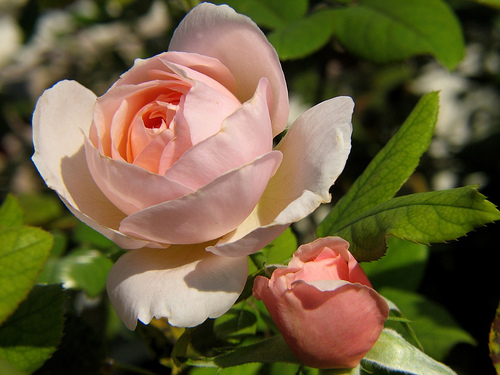

In [12]:
PIL.Image.open(roses[40])

In [13]:
flowers_names = {'roses' : 0, 'daisy' : 1, 'dandelion' : 2, 'sunflowers' : 3, 'tulips': 4}

In [14]:
flowers_names['daisy']

1

In [15]:
flowers_images_dict = {'roses' : list(data_path.glob('roses/*')),
                      'daisy' : list(data_path.glob('daisy/*')),
                      'dandelion' : list(data_path.glob('dandelion/*')),
                      'sunflowers' : list(data_path.glob('sunflowers/*')),
                      'tulips': list(data_path.glob('tulips/*'))
}

In [16]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [17]:
for i in flowers_images_dict:
    print(i, ":", flowers_images_dict[i])

roses : [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flower_photos/roses

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [19]:
img.shape

(240, 179, 3)

In [20]:
img = cv2.imread(str(flowers_images_dict['roses'][11]))

In [21]:
img.shape

(256, 320, 3)

In [22]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [23]:
X, y = [], []
for flower_name, images in  flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img, (180, 180))
        X.append(resized)
        y.append(flowers_names[flower_name])
        

In [24]:
X[111].shape

(180, 180, 3)

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
X = X/255

In [27]:
X

array([[[[0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.06666667, 0.03529412],
         ...,
         [0.09019608, 0.19607843, 0.12156863],
         [0.09803922, 0.2       , 0.1254902 ],
         [0.10196078, 0.20392157, 0.12941176]],

        [[0.03921569, 0.09019608, 0.05882353],
         [0.03921569, 0.09019608, 0.05882353],
         [0.03529412, 0.08627451, 0.05490196],
         ...,
         [0.07843137, 0.17254902, 0.11764706],
         [0.09019608, 0.18431373, 0.12941176],
         [0.10196078, 0.19607843, 0.14117647]],

        [[0.05098039, 0.07843137, 0.05098039],
         [0.04705882, 0.07843137, 0.05098039],
         [0.04313725, 0.0745098 , 0.04705882],
         ...,
         [0.08235294, 0.16862745, 0.11764706],
         [0.08627451, 0.17647059, 0.12156863],
         [0.09803922, 0.18823529, 0.13333333]],

        ...,

        [[0.04705882, 0.09411765, 0.07058824],
         [0.04313725, 0.08627451, 0.05882353]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
X_train.shape

(2936, 180, 180, 3)

In [31]:
X_test.shape

(734, 180, 180, 3)

In [32]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding = "same", activation = 'relu', input_shape = (180,180,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
])

In [33]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 46s 474ms/step - loss: 1.3525 - Accuracy: 0.4247
Epoch 2/5
92/92 [==============================] - 27s 296ms/step - loss: 0.9902 - Accuracy: 0.6161
Epoch 3/5
92/92 [==============================] - 32s 348ms/step - loss: 0.8194 - Accuracy: 0.6907
Epoch 4/5
92/92 [==============================] - 32s 352ms/step - loss: 0.6183 - Accuracy: 0.7619
Epoch 5/5
92/92 [==============================] - 36s 392ms/step - loss: 0.4312 - Accuracy: 0.8539


In [35]:
cnn.evaluate(X_test, y_test)

23/23 [==============================] - 4s 162ms/step - loss: 1.0805 - Accuracy: 0.6526


[1.0804694890975952, 0.6525885462760925]

In [36]:
import matplotlib.pyplot as plt

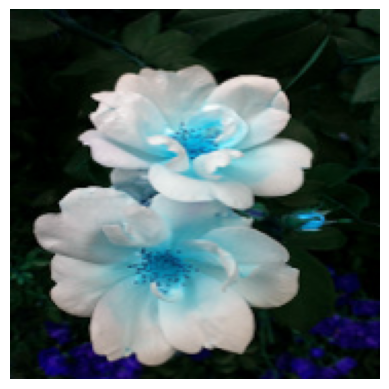

In [37]:
plt.axis('off')
plt.imshow(X[0])
plt.show()

In [38]:
data_augmentation = keras.layers.experimental.preprocessing.RandomZoom(0.5)

In [39]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.03972524, 0.08815787, 0.05729488],
        [0.03539314, 0.08480563, 0.05256251],
        [0.0283634 , 0.08530875, 0.0426277 ],
        ...,
        [0.08541545, 0.17973796, 0.11459994],
        [0.07968177, 0.1728401 , 0.11718696],
        [0.0882902 , 0.1818321 , 0.12699634]],

       [[0.04700932, 0.07838187, 0.05093088],
        [0.04267721, 0.07542989, 0.04659878],
        [0.03498125, 0.07920563, 0.03962757],
        ...,
        [0.07837923, 0.16816343, 0.1137215 ],
        [0.08173092, 0.1692237 , 0.11580683],
        [0.08576493, 0.17597124, 0.11927866]],

       [[0.05000697, 0.08189674, 0.0543924 ],
        [0.045414  , 0.07930195, 0.05010847],
        [0.03884813, 0.08239592, 0.04318023],
        ...,
        [0.07146422, 0.15851684, 0.10712591],
        [0.08121208, 0.17445768, 0.10539705],
        [0.08546109, 0.17957874, 0.10511464]],

       ...,

       [[0.03758117, 0.07964598, 0.04741436],
        [0.03

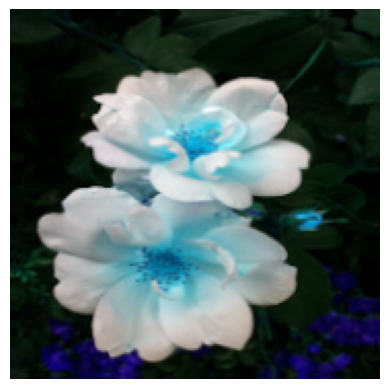

In [41]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy())
plt.show()

In [42]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)  
])

In [43]:
cnn = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding = "same", activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
])

In [45]:
cnn.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [46]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 28s 290ms/step - loss: 1.4342 - Accuracy: 0.4104
Epoch 2/5
92/92 [==============================] - 33s 355ms/step - loss: 1.0978 - Accuracy: 0.5599
Epoch 3/5
92/92 [==============================] - 33s 356ms/step - loss: 0.9880 - Accuracy: 0.6104
Epoch 4/5
92/92 [==============================] - 40s 431ms/step - loss: 0.9344 - Accuracy: 0.6413
Epoch 5/5
92/92 [==============================] - 37s 407ms/step - loss: 0.8594 - Accuracy: 0.6802


In [47]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 28s 303ms/step - loss: 0.8336 - Accuracy: 0.6805
Epoch 2/10
92/92 [==============================] - 39s 429ms/step - loss: 0.7880 - Accuracy: 0.7023
Epoch 3/10
92/92 [==============================] - 38s 417ms/step - loss: 0.7671 - Accuracy: 0.7078
Epoch 4/10
92/92 [==============================] - 38s 408ms/step - loss: 0.6981 - Accuracy: 0.7415
Epoch 5/10
92/92 [==============================] - 39s 421ms/step - loss: 0.6724 - Accuracy: 0.7446
Epoch 6/10
92/92 [==============================] - 51s 550ms/step - loss: 0.6426 - Accuracy: 0.7616
Epoch 7/10
92/92 [==============================] - 38s 418ms/step - loss: 0.5994 - Accuracy: 0.7742
Epoch 8/10
92/92 [==============================] - 38s 413ms/step - loss: 0.5713 - Accuracy: 0.7885
Epoch 9/10
92/92 [==============================] - 50s 543ms/step - loss: 0.5542 - Accuracy: 0.7970
Epoch 10/10
92/92 [==============================] - 47s 506ms/step - loss: 0.5221 - Accura